<a href="https://colab.research.google.com/github/ManikantaSanjay/Financial_Analysis_Using_Python_and_ML_Libraries/blob/main/Stock_Price_Predictions_Using_Ridge_regression_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

#TASK #2: IMPORT DATASETS AND LIBRARIES


In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [2]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [3]:
# Read the stocks volume data
stock_vol_df = pd.read_csv("/content/stock_volume.csv")
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [4]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [6]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [7]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [8]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [9]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [10]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [11]:
def normalize(df):
    """
    Normalize the stock prices in the DataFrame based on their initial price.

    Args:
        df (pandas.DataFrame): DataFrame with the stock prices.
        The first column should be the 'Date'.

    Returns:
        x (pandas.DataFrame): A DataFrame with the normalized stock prices.
    """
    # Make a copy of the input DataFrame to avoid changing the original data
    x = df.copy()

    # Loop through each column in the DataFrame (skipping the first 'Date' column)
    for column in x.columns[1:]:
        # Normalize the stock prices by dividing each price by the initial price of the stock
        x[column] = x[column]/x[column][0]

    # Return the DataFrame with normalized stock prices
    return x

In [14]:
def interactive_plot(df, title):
    """
    Create an interactive line plot of stock prices using Plotly Express.

    Args:
        df (pandas.DataFrame): DataFrame with the stock prices.
        The first column should be the 'Date'.
        title (str): The title of the plot.

    Returns:
        None. This function will plot the data.
    """
    # Create an empty line plot
    fig = px.line(title=title)

    # Loop through each column in the DataFrame (skipping the first 'Date' column)
    for column in df.columns[1:]:
        # Add a scatter trace for each stock
        fig.add_scatter(x=df['Date'], y=df[column], name=column)

    # Display the plot
    fig.show()

In [15]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [16]:
def individual_stock(price_df, vol_df, name):
    """
    Create a DataFrame for an individual stock, including date, closing price, and volume.

    Args:
        price_df (pandas.DataFrame): DataFrame with the stock prices.
        The first column should be the 'Date'.

        vol_df (pandas.DataFrame): DataFrame with the stock volumes.
        The first column should be the 'Date'.

        name (str): The column name in price_df and vol_df that represents the stock.

    Returns:
        stock_df (pandas.DataFrame): A DataFrame with columns for date, close price and volume.
    """
    # Concatenate the date, close price, and volume into one DataFrame
    stock_df = pd.DataFrame({
        'Date': price_df['Date'],
        'Close': price_df[name],
        'Volume': vol_df[name]
    })

    return stock_df

In [17]:
def trading_window(data):
    """
    Create a target feature in the DataFrame for future prediction.

    The function creates a new column 'Target' in the DataFrame that shifts the 'Close' price column up by one row (next day price).
    This column will be used as the target variable for machine learning models.

    Args:
        data (pandas.DataFrame): A DataFrame that includes a 'Close' column, which indicates the closing price of a stock.

    Returns:
        data (pandas.DataFrame): The same DataFrame but with an additional 'Target' column, which is the shifted 'Close' column.
    """
    # Define the window size
    n = 1

    # Create a new column in the DataFrame called 'Target'. This column is the same as the 'Close' column but shifted 'n' rows up
    data['Target'] = data['Close'].shift(-n)

    # Return the modified DataFrame
    return data

In [18]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [19]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [20]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [21]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(df):
    """
    Scales the input DataFrame using MinMaxScaler to a range between 0 and 1.
    This function does not scale the 'Date' column.

    Args:
        df (pandas.DataFrame): Input DataFrame that includes a 'Date' column.

    Returns:
        scaled_array (numpy.ndarray): Scaled array, does not include 'Date'.
    """
    # Initialize a scaler with feature range of 0 to 1
    sc = MinMaxScaler(feature_range = (0, 1))

    # Fit the scaler to the data and transform the data
    scaled_array = sc.fit_transform(df.drop(columns=['Date']))

    return scaled_array

In [22]:
price_volume_target_scaled_df  = scale_data(price_volume_target_df)
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [23]:
price_volume_target_scaled_df.shape

(2158, 3)

In [24]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [25]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [26]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [27]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [28]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

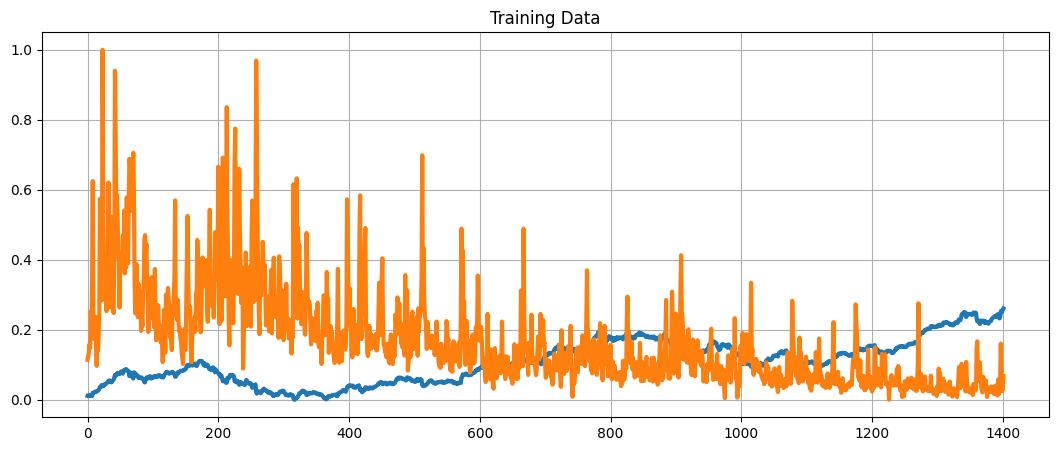

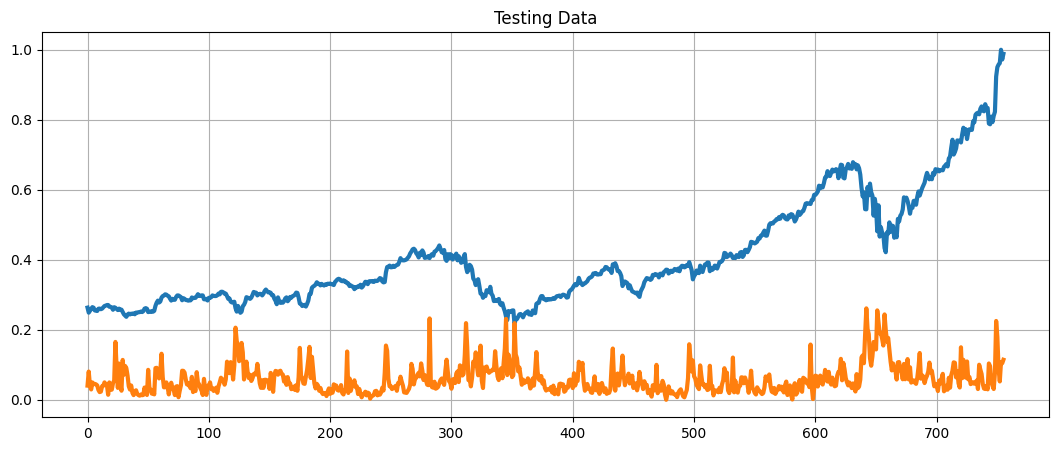

In [31]:
def show_plot(data, title):
    """
    Function to plot data with a title and grid.

    Args:
        data (list or numpy.ndarray or pandas.DataFrame): Data to be plotted.
        title (str): Title of the plot.
        color (str, optional): Color of the line. Defaults to 'blue'.

    Returns:
        None
    """
    # Create a new figure with a specified size
    plt.figure(figsize = (13, 5))

    # Plot the data with a specified linewidth
    plt.plot(data, linewidth = 3)

    # Set the title of the plot
    plt.title(title)

    # Show grid lines
    plt.grid()

    # Display the plot
    plt.show()

# Example usage:
show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [32]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [33]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.7950028030821767


In [34]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [35]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [36]:
len(Predicted)

2158

In [37]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [38]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [39]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [40]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.034664
1,2012-01-13,0.010462,0.033746
2,2012-01-17,0.012209,0.034519
3,2012-01-18,0.013785,0.034556
4,2012-01-19,0.013299,0.034707
...,...,...,...
2153,2020-08-04,0.957606,0.778280
2154,2020-08-05,0.961583,0.783205
2155,2020-08-06,1.000000,0.810483
2156,2020-08-07,0.972088,0.788760


In [41]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [42]:
# Let's test the functions and get individual stock prices and volumes for SP500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [43]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [44]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [45]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [47]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [48]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [49]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [50]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [51]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 10s 56ms/step - loss: 0.0335 - val_loss: 0.0593
Epoch 2/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0062 - val_loss: 0.0018
Epoch 3/20
38/38 [==============================] - 1s 19ms/step - loss: 5.1043e-04 - val_loss: 6.2549e-05
Epoch 4/20
38/38 [==============================] - 1s 21ms/step - loss: 3.7237e-04 - val_loss: 3.0131e-04
Epoch 5/20
38/38 [==============================] - 1s 31ms/step - loss: 3.5612e-04 - val_loss: 2.9317e-04
Epoch 6/20
38/38 [==============================] - 1s 32ms/step - loss: 3.1390e-04 - val_loss: 1.1496e-04
Epoch 7/20
38/38 [==============================] - 1s 22ms/step - loss: 3.3634e-04 - val_loss: 4.0984e-05
Epoch 8/20
38/38 [==============================] - 1s 18ms/step - loss: 3.0880e-04 - val_loss: 9.9367e-05
Epoch 9/20
38/38 [==============================] - 1s 19ms/step - loss: 2.6644e-04 - val_loss: 6.8422e-05
Epoch 10/20
38/38 [==============================] -

In [60]:
# Make prediction
predicted = model.predict(X)

68/68 [==============================] - 0s 5ms/step


In [61]:
predicted

array([[0.004482  ],
       [0.00148048],
       [0.00362512],
       ...,
       [0.9227638 ],
       [0.92363036],
       [0.92738396]], dtype=float32)

In [62]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [63]:
test_predicted

[0.0044819955,
 0.0014804825,
 0.003625121,
 0.010353571,
 0.01337813,
 0.013790137,
 0.014080403,
 0.013448357,
 0.018790197,
 0.015218107,
 0.014234881,
 0.0126805175,
 0.012399616,
 0.01786789,
 0.01854676,
 0.027609507,
 0.027342677,
 0.02861589,
 0.029977927,
 0.03090936,
 0.026551638,
 0.030825127,
 0.030230697,
 0.02682779,
 0.033759758,
 0.03525272,
 0.035711363,
 0.033581905,
 0.03629636,
 0.037363417,
 0.038229194,
 0.040377237,
 0.037335373,
 0.041271,
 0.039183885,
 0.03670353,
 0.026888646,
 0.031227648,
 0.037443005,
 0.039764177,
 0.039867114,
 0.05149932,
 0.050718047,
 0.054610386,
 0.055344876,
 0.0579551,
 0.055976383,
 0.054746065,
 0.050016254,
 0.052042037,
 0.061117098,
 0.059250817,
 0.055985756,
 0.05492852,
 0.057356335,
 0.06230046,
 0.059653066,
 0.05290752,
 0.052495826,
 0.045065947,
 0.03401713,
 0.038753327,
 0.047578588,
 0.03947871,
 0.039155785,
 0.04908053,
 0.046441633,
 0.042595327,
 0.0433487,
 0.03792499,
 0.040278926,
 0.04903838,
 0.053384706,


In [64]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [65]:
df_predicted['predictions'] = test_predicted

In [66]:
df_predicted

,Date,predictions
1,2012-01-13,0.004482
2,2012-01-17,0.001480
3,2012-01-18,0.003625
4,2012-01-19,0.010354
5,2012-01-20,0.013378
...,...,...
2154,2020-08-05,0.905281
2155,2020-08-06,0.914008
2156,2020-08-07,0.922764
2157,2020-08-10,0.923630


In [67]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [68]:
df_predicted['Close'] = close[1:]

In [69]:
df_predicted

,Date,predictions,Close
1,2012-01-13,0.004482,0.005242
2,2012-01-17,0.001480,0.007414
3,2012-01-18,0.003625,0.014231
4,2012-01-19,0.010354,0.017295
5,2012-01-20,0.013378,0.017713
...,...,...,...
2154,2020-08-05,0.905281,0.972307
2155,2020-08-06,0.914008,0.982453
2156,2020-08-07,0.922764,0.983459
2157,2020-08-10,0.923630,0.987819


In [70]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")

# **MINI CHALLENGE**

**MINI CHALLENGE #1:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**

In [71]:
# Get the statistical data for the stocks volume dataframe
# Average trading volume for Apple stock is 2.498238e+06
# Average trading volume for S&P500 is 3.680732e+09

# Why S&P500 is the most traded of all? Check out this article:
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time,
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [73]:
# Get the statistical data for the prices dataframe
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
# Average price for S&P500 = 2218.749554
# Maximum Tesla Price = 1643.000000

**MINI CHALLENGE #2:**
- **Plot the normalized stock prices and volume dataset.**

In [74]:
# Plot interactive chart for volume data
# Notice that S&P500 trading is orders of magnitude compared to individual stocks
interactive_plot(stock_vol_df, 'Stocks Volume')

In [75]:
# plot interactive chart for normalized stocks prices data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')